# TEESSIDE UNIVERSITY
M.sc Data Science with Advanced Practise


Name: Joseph Oluwatobi Komolafe\
Student Number: B1322611\
Email: b1322611@tees.ac.uk

# Machine Learning Approaches for Stroke Prediction: A Performance Evaluation.

The dataset used is from https://www.kaggle.com/fedesoriano/stroke-prediction-dataset/download

As indicated by the World Health Organization (WHO), stroke is the second main reason for death worldwide. It is liable for roughly 11% of complete deaths.

This dataset is utilized to see the performance and accuracy of machine learning algorithms in predicting whether a patient is probably going to get stroke or not. 

### 1) Data Capture
- Importing Libraries
- Importing Dataset
- Cleaning Dataset and fixing missing values
  
    

### 2) Exploring Data and Visualisation
- Correlation Heat Map
- Univariate Analysis
  - Categorical Features
- Bivariate Analysis
- Scatter Plot of the Numerical Features
- Violin Plot of the Continous Features
- Conclusion from Visualisation

### 3) Research Questions
- What is being Analysed?
- Why is it being Analysed?
- How is it being Analysed?


### 4) Pre-processing the Data 
- Splitting the dataset
- Balancing the data using SMOTE technique
- Selection of Models
- Models Comparison
- Models Tuning
- Tuning Hyperparameters

### 5) Conclusion

## 1) Data Capture
- 1.1 Importing Libraries


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import xgboost
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
    
import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff





In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#### 1.2 Importing Dataset

In [ ]:
# Import the raw data
import pandas as pd 
df=pd.read_csv('gdrive/My Drive/Prediction of Stroke.csv')

In [ ]:
# Get the first five rows
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# Get the last five rows
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
# Get the list of columns in the dataset
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
# Get the data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### 1.3 Working on Missing Values

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We visualise the missing values in BMI with the two graphs below:

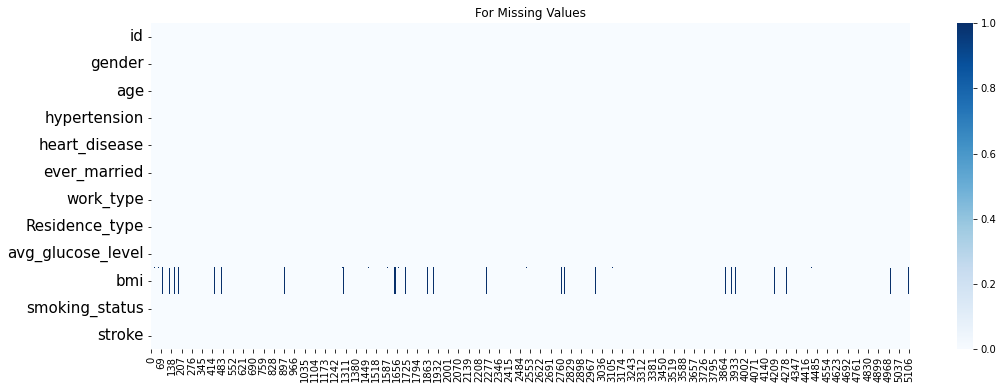

In [ ]:
f, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(17,6))

sns.heatmap(df.T.isna(), cmap='Blues')
ax.set_title('For Missing Values')

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.show()

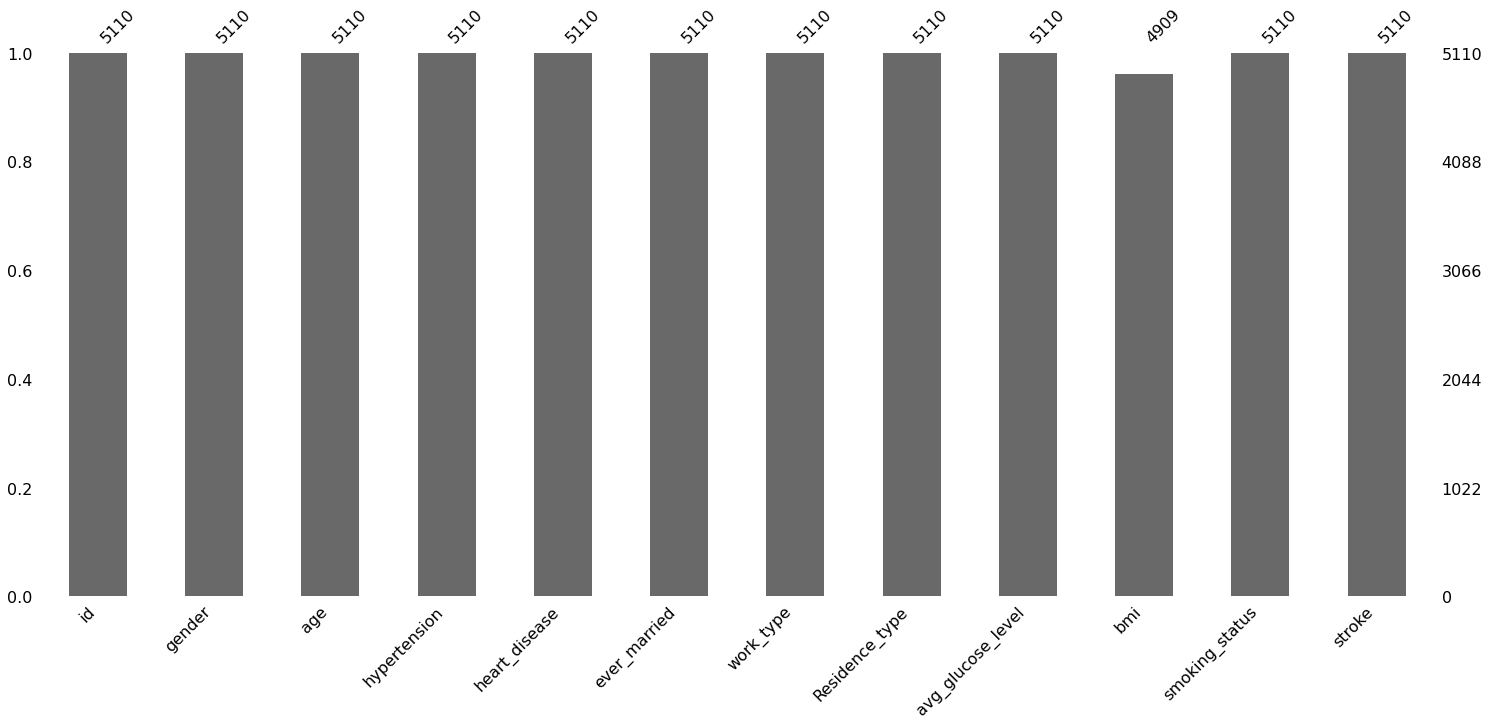

In [ ]:
import missingno as msno
msno.bar(df)
plt.show()

In [ ]:
# We will fill the missing values in the Body Mass Index variable with the average value
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)

In [ ]:
#checking to be sure there are no more null values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# Trying to check if the dataset is balanced
y = df['stroke']
print(f'Percentage of patient that might have a stroke: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} patient)\nPercentage of patient that might not have a stroke: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} patient)')

Percentage of patient that might have a stroke: % 4.87 --> (249 patient)
Percentage of patient that might not have a stroke: % 95.13 --> (4861 patient)


This information above shows that we have an unbalanced data.

In [ ]:
fig = px.histogram(df, x="stroke", title='Stroke', width=400, height=400)
fig.show()

From the graph above, the stroke rate in our data is 0.048. This is a strong indicator of class inbalance. We will address this later using SMOTE.

## 2. Exploring Data and Visualisation

### 2.1 Correlation Heatmap

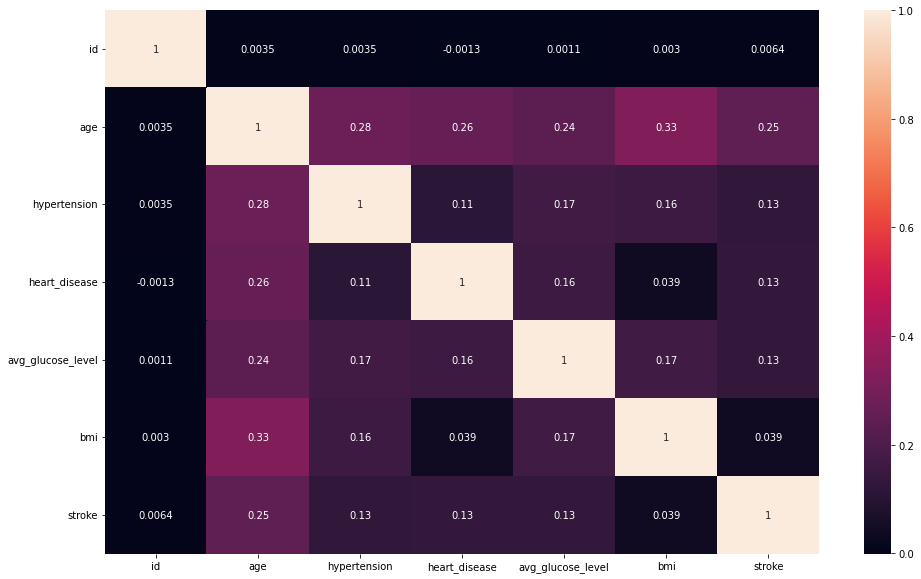

In [ ]:

plt.figure(figsize=(16,10))
sns.heatmap(df.corr(method='pearson'), annot=True)

We will look at the Numerical and Categorical features of the data and also univariate and multivariate analysis.

In [ ]:
categorical = ['gender', 'hypertension', 'heart_disease', 'ever_married',
'work_type', 'Residence_type', 'smoking_status']

numerical = ['age','avg_glucose_level', 'bmi']

In [ ]:
#Numerical Features
df[numerical].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.698018
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.800000
50%,45.000000,91.885000,28.400000
75%,61.000000,114.090000,32.800000
max,82.000000,271.740000,97.600000


### 2.2 Univariate Analysis

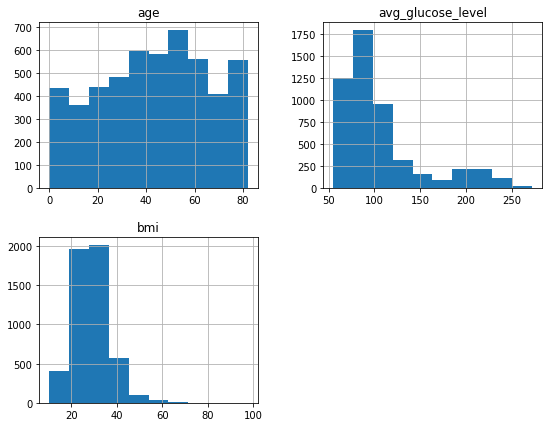

In [ ]:
df[numerical].hist(figsize=(9,7));

#### 2.2.1 Categorical Features 

#### Gender

In [ ]:
print (f'{round(df["gender"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="gender", title='Gender', width=500, height=500)
fig.show()

Female    58.59
Male      41.39
Other      0.02
Name: gender, dtype: float64


From the graph, females are 2994, males are 2115, other is 1.

#### Hypertension

In [ ]:
print (f'{round(df["hypertension"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="hypertension", title='hypertension', width=500, height=500)
fig.show()

0    90.25
1     9.75
Name: hypertension, dtype: float64


There are 498 patients with hypertension which represents about 10% of the dataset.

#### Heart Disease

In [ ]:
print (f'{round(df["heart_disease"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="heart_disease", title='Heart Disease', width=500, height=500)
fig.show()

0    94.6
1     5.4
Name: heart_disease, dtype: float64


There are 276 patients with heart disease which is 5.4% of the dataset.

####  Ever Married

In [ ]:
print (f'{round(df["ever_married"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="ever_married", title='Ever Married', width=500, height=500)
fig.show()

Yes    65.62
No     34.38
Name: ever_married, dtype: float64


3353 people were married and 1757 people are unmarried.

####  Work Type

In [ ]:
print (f'{round(df["work_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="work_type", title='Work Type', width=500, height=500)
fig.show()

Private          57.24
Self-employed    16.03
children         13.44
Govt_job         12.86
Never_worked      0.43
Name: work_type, dtype: float64


2925 people works in the private sector,819 people are self-employed,657 people works at the government job, 687 are children and 22 never worked

####  Residence Type

In [ ]:
print (f'{round(df["Residence_type"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="Residence_type", title='Residence Type', width=500, height=500)
fig.show()

Urban    50.8
Rural    49.2
Name: Residence_type, dtype: float64


2596 people lives in the urban area and 2514 people lives in the rural area

#### Smoking

In [ ]:
print (f'{round(df["smoking_status"].value_counts(normalize=True)*100,2)}')
fig = px.histogram(df, x="smoking_status", title='smoking_status', width=500, height=500)
fig.show()

never smoked       37.03
Unknown            30.22
formerly smoked    17.32
smokes             15.44
Name: smoking_status, dtype: float64


1892 people never smoked, 789 people smokes, 885 people smoked in the past, 1544 are unknown 

### 2.3 Bivariate Analysis 

#### Hypertension & Stroke

In [ ]:
print (f'Someone with hypertension has a probability of {round(df[df["hypertension"]==1]["stroke"].mean()*100,2)} % get a stroke')

print()

print (f'Someone without hypertension has a probability of  {round(df[df["hypertension"]==0]["stroke"].mean()*100,2)} % get a stroke')

Someone with hypertension has a probability of 13.25 % get a stroke

Someone without hypertension has a probability of  3.97 % get a stroke


In [ ]:

fig = px.histogram(df, x="hypertension", color="stroke", title="Hypertension & Stroke", width=500, height=500)
fig.show()

Stroke probability for those who has hypertension is 13.2% and 3.9% for those who does not.

This means that someone with hypertension are approximately 3.3 times more likely to get stroke than those who don't have hypertension.

#### Gender & Stroke

In [ ]:
print (f'A female has a probability of {round(df[df["gender"]=="Female"]["stroke"].mean()*100,2)}% to get a stroke')

print()

print (f'A male has a probability of {round(df[df["gender"]=="Male"]["stroke"].mean()*100,2)}% to get a stroke')

print()

print (f'Someone from  the other category of gender has a probability of {round(df[df["gender"]=="Other"]["stroke"].mean()*100,2)}% to get a stroke')

A female has a probability of 4.71% to get a stroke

A male has a probability of 5.11% to get a stroke

Someone from  the other category of gender has a probability of 0.0% to get a stroke


In [ ]:
fig = px.histogram(df, x="gender", color="stroke", title="Gender & Stroke", width=500, height=500)
fig.show()

Males are more at risk of getting stroke than Females but the difference is negligible.

#### Marital Status & Stroke 

In [ ]:
print (f'Someone married (or married before) with a probability of {round(df[df["ever_married"]=="Yes"]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'Someone never married with a probability of {round(df[df["ever_married"]=="No"]["stroke"].mean()*100,2)}% gets a stroke')

Someone married (or married before) with a probability of 6.56% gets a stroke

Someone never married with a probability of 1.65% gets a stroke


In [ ]:
fig = px.histogram(df, x="ever_married", color="stroke", title="Marital Status & Stroke", width=500, height=500)
fig.show()

Peolple that are or were married have a 6.56% probability of having stroke while those that are single has 1.65%. This means Married people are 5.7 times more likely to have stroke than those that are single.

#### Heart Disease & Stroke 

In [ ]:
print (f'Someone with heart disease with a probability of {round(df[df["heart_disease"]==1]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'Someone without heart disease with a probability of {round(df[df["heart_disease"]==0]["stroke"].mean()*100,2)}% gets a stroke')

Someone with heart disease with a probability of 17.03% gets a stroke

Someone without heart disease with a probability of 4.18% gets a stroke


In [ ]:
fig = px.histogram(df, x="heart_disease", color="stroke", title="Heart Disease & Stroke", width=500, height=500)
fig.show()

The probability of people living with heart disease is 17.03% and those who are not is 4.18%. This means those living with heart disease are 4.07 times more likely to have stroke compared to those who does not have heart disease

#### Work Type & Stroke 

In [ ]:
print (f'Someone with private work type with a probability of {round(df[df["work_type"]=="Private"]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'Self-employed person with a probability of {round(df[df["work_type"]=="Self-employed"]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'Someone with a goverment job with a probability of {round(df[df["work_type"]=="Govt_job"]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'A child with a probability of {round(df[df["work_type"]=="children"]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'Someone who never worked with a probability of {round(df[df["work_type"]=="Never_worked"]["stroke"].mean()*100,2)}% gets a stroke')

Someone with private work type with a probability of 5.09% gets a stroke

Self-employed person with a probability of 7.94% gets a stroke

Someone with a goverment job with a probability of 5.02% gets a stroke

A child with a probability of 0.29% gets a stroke

Someone who never worked with a probability of 0.0% gets a stroke


In [ ]:
fig = px.histogram(df, x="work_type", color="stroke", title="Work Type & Stroke", width=500, height=500)
fig.show()

People  with private jobs and goverment jobs almost has same probability to get stroke and Self employed people has more probability to get stroke than other work types.

#### Smoking Status & Stroke

In [ ]:
print (f'Someone that smoked formerly with a probability of {round(df[df["smoking_status"]=="formerly smoked"]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'Someone that never smoked with  a probability of {round(df[df["smoking_status"]=="never smoked"]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'Someone that smokes with a probability of {round(df[df["smoking_status"]=="smokes"]["stroke"].mean()*100,2)}% gets a stroke')

print()

print (f'Someone whom smoking history is not known,has a probability of {round(df[df["smoking_status"]=="Unknown"]["stroke"].mean()*100,2)}% gets a stroke')

print()

Someone that smoked formerly with a probability of 7.91% gets a stroke

Someone that never smoked with  a probability of 4.76% gets a stroke

Someone that smokes with a probability of 5.32% gets a stroke

Someone whom smoking history is not known,has a probability of 3.04% gets a stroke



In [ ]:
fig = px.histogram(df, x="smoking_status", color="stroke", title="Smoking Status & Stroke", width=500, height=500)
fig.show()

Someone who smoked formerly has a probability to get stroke 1.66 times more than someone who never smoked,
Someone that smokes has a probability to get stroke 1.11 times more than someone who never smoked and there
is a little difference between who smokes and who does not smoke in regard to probability of getting stroke.

#### Residence Type & Stroke

In [ ]:
print (f'Someone who lives in an urban area with a probability of {round(df[df["Residence_type"]=="Urban"]["stroke"].mean()*100,2)}%  gets a stroke')

print()

print (f'Someone who lives in a rural area with a probability of {round(df[df["Residence_type"]=="Rural"]["stroke"].mean()*100,2)}% gets a stroke')

Someone who lives in an urban area with a probability of 5.2%  gets a stroke

Someone who lives in a rural area with a probability of 4.53% gets a stroke


In [ ]:
fig = px.histogram(df, x="Residence_type", color="stroke", title="Residence Type & Stroke", width=500, height=500)
fig.show()

There is no much difference between those that lives in Urban and rural areas in having stroke

### 2.4 Scatter Plots of the numerical features 

#### Age & BMI

In [ ]:
fig = px.scatter(df, x='age', y='bmi', title='Age & BMI ',color='stroke', hover_data = df[['stroke']])
fig.show()

#### Average Glucose Level & BMI

In [ ]:
fig = px.scatter(df, y='avg_glucose_level', x='bmi', title='Average Glucose Level & BMI ',color='stroke', hover_data = df[['stroke']])
fig.show()

#### Average Glucose Level & Age

In [ ]:
fig = px.scatter(df, y='avg_glucose_level', x='age', title='Age & Average Glucose Level',color='stroke', hover_data = df[['stroke']])
fig.show()

2.5 Violin Plot of the continous features

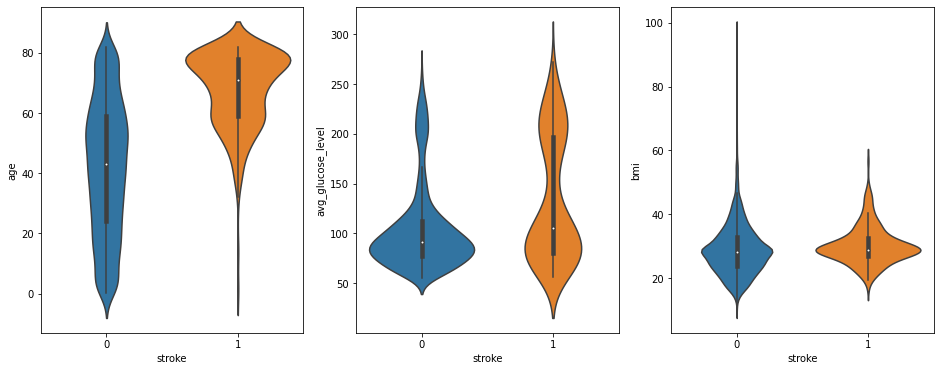

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,3,1)
sns.violinplot(x = 'stroke', y = 'age', data = df)
plt.subplot(1,3,2)
sns.violinplot(x = 'stroke', y = 'avg_glucose_level', data = df)
plt.subplot(1,3,3)
sns.violinplot(x = 'stroke', y = 'bmi', data = df)
plt.show()

### 2.6 Conclusions from Visualisation



*   There are outliers in avg_glucose_level and bmi
*   As seen in the histograms, both features have skewness in different degrees because of outliers
*   avg_glucose_level increases with age and leads to more chances of stroke
*   The stroke class is highly imbalanced which will be dealth with in section 4.





## 3. Research Questions

### 3.1 What is being Analysed?

The goal of this reasearch is to look at the performance of different machine learning algorithms based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides crucial information.



### 3.2 Why is it being Analysed?

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This reasearch will help in making decisions about peoples health globally using the appropriate Machine  Learning algorithm and to help medical scientists have the right information about preventing strokes.

### 3.3 How is it being analysed?

- The dataset is loaded and missing data will be replaced.
- Exploratory data analysis was done.
- The dataset will be balanced
- Four algorithms will be used and the one with the highest accuracy will be picked as the model.



## 4. Preprocessing of Data

Checking the effect of outliers on the reduction of dataset

In [ ]:
print("The number of people who don't have stroke : ", df['stroke'].value_counts()[0])
print("The number of people who don't have stroke : ", df['stroke'].value_counts()[1])
cond1 = df['avg_glucose_level'] > 170
cond2 = df['stroke'] == 1
print("The number of outliers in avg_glucose_level with stroke = 1 are : ", df[cond1 & cond2].shape)
cond3 = df['bmi'] > 47
cond4 = df['stroke'] == 1
print("The number of outliers in bmi with stroke = 1 are : ", df[cond3 & cond4].shape)

The number of people who don't have stroke :  4861
The number of people who don't have stroke :  249
The number of outliers in avg_glucose_level with stroke = 1 are :  (83, 12)
The number of outliers in bmi with stroke = 1 are :  (3, 12)


I will remove the outliers in bmi because the number is 3 which will not affect the dataset much compared with avg_glucose_level which has 83.

In [ ]:
print("The shape before removing the BMI outliers : ",df.shape)
df.drop(df[df['bmi'] > 47].index, inplace = True)
print("The shape after removing the BMI outliers : ",df.shape)

The shape before removing the BMI outliers :  (5110, 12)
The shape after removing the BMI outliers :  (4993, 12)


In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


I will be handling the Categorical data using Label Encoder

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

In [ ]:
df[['ever_married', 'Residence_type', 'smoking_status', 'gender', 'work_type']].head()

,ever_married,Residence_type,smoking_status,gender,work_type
0,1,1,1,1,2
1,1,0,2,0,3
2,1,0,2,1,2
3,1,1,3,0,2
4,1,0,2,0,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4993 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4993 non-null   int64  
 1   gender             4993 non-null   int64  
 2   age                4993 non-null   float64
 3   hypertension       4993 non-null   int64  
 4   heart_disease      4993 non-null   int64  
 5   ever_married       4993 non-null   int64  
 6   work_type          4993 non-null   int64  
 7   Residence_type     4993 non-null   int64  
 8   avg_glucose_level  4993 non-null   float64
 9   bmi                4993 non-null   float64
 10  smoking_status     4993 non-null   int64  
 11  stroke             4993 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 507.1 KB


This shows that categorical values have been handled.

#### 4.1 Splitting the dataset into X and Y  

In [ ]:
x = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

print('X Shape', x.shape)
print('Y Shape',y.shape)

X Shape (4993, 10)
Y Shape (4993,)


In [ ]:
#Splitting into Train Test

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

print('Number transactions x_train df',X_train.shape)
print('Number transactions x_test df',X_test.shape)
print('Number transactions y_train df',y_train.shape)
print('Number transactions y_test df',y_test.shape)

Number transactions x_train df (3495, 10)
Number transactions x_test df (1498, 10)
Number transactions y_train df (3495,)
Number transactions y_test df (1498,)


In [ ]:
## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

####  4.2 Balancing the data using Smote Technique

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train==1)))
print('Before OverSampling, counts of label 0: {} \n'.format(sum(y_train==0)))

Before OverSampling, counts of label 1: 179
Before OverSampling, counts of label 0: 3316 



In [ ]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

After OverSampling, the shape of train_X: (6632, 10)
After OverSampling, the shape of train_y: (6632,) 

After OverSampling, counts of label '1': 3316
After OverSampling, counts of label '0': 3316


#### 4.3 Selection of Model using the preprocessed and balanced data 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
models = []
models.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss', use_label_encoder = False)] )
models.append(['Logistic Regression',LogisticRegression(random_state=0)])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res,y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train_res,y = y_train_res, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(models[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[1307  124]
 [  44   23]]
Accuracy Score:  0.8878504672897196

K-Fold Validation Mean Accuracy: 90.94 %

Standard Deviation: 4.14 %

ROC AUC Score: 0.63 %

Precision: 0.16 %

Recall: 0.34 %

F1 Score: 0.21 %
----------------------------------------

Logistic Regression :
[[1081  350]
 [  13   54]]
Accuracy Score:  0.7576769025367156

K-Fold Validation Mean Accuracy: 78.36 %

Standard Deviation: 1.39 %

ROC AUC Score: 0.78 %

Precision: 0.13 %

Recall: 0.81 %

F1 Score: 0.23 %
----------------------------------------

DecisionTree :
[[1316  115]
 [  50   17]]
Accuracy Score:  0.8898531375166889

K-Fold Validation Mean Accuracy: 90.77 %

Standard Deviation: 2.70 %

ROC AUC Score: 0.59 %

Precision: 0.13 %

Recall: 0.25 %

F1 Score: 0.17 %
----------------------------------------

RandomForest :
[[1375   56]
 [  58    9]]
Accuracy Score:  0.9238985313751669

K-Fold Validation Mean Accuracy: 96.17 %

Standard Deviation: 2.17 %

ROC AUC Score: 0.55 %

Precision: 0.14 %

Rec

### 4.4 Model Comparison

In [ ]:
# I want to do comparisons 

df_new = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df_new.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df_new



,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
3,RandomForest,92.389853,96.170860,2.169525,0.547597,0.138462,0.134328,0.136364
2,DecisionTree,88.985314,90.772706,2.696524,0.586684,0.128788,0.253731,0.170854
0,XGBClassifier,88.785047,90.939709,4.138639,0.628315,0.156463,0.343284,0.214953
1,Logistic Regression,75.767690,78.362750,1.392900,0.780693,0.133663,0.805970,0.229299


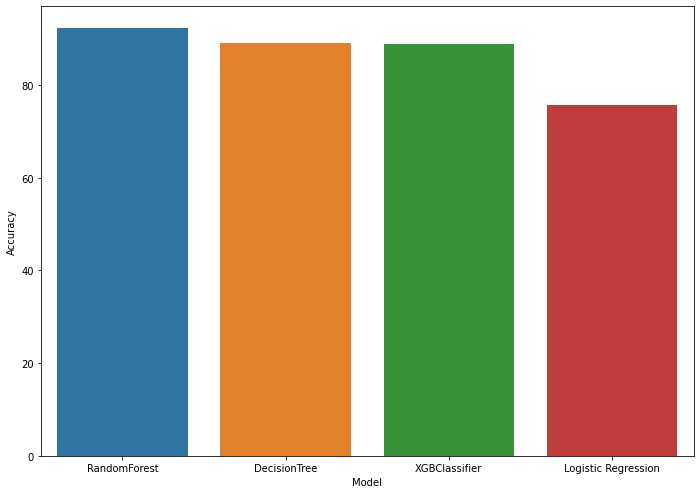

In [ ]:
a4_dims = (11.7, 8.27)
fig, ax=plt.subplots(figsize=a4_dims)
sns.barplot(data=df_new, x="Model", y="Accuracy", ax=ax)

### 4.5 Models Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}]),
                (LogisticRegression(),[{'C':[0.23,0.5,0.74,1],'random_state':[0]}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]

In [ ]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train_res, y_train_res)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

XGBClassifier():
Best Accuracy : 90.94%
Best Parameters :  {'eval_metric': 'error', 'learning_rate': 0.1}

----------------

LogisticRegression():
Best Accuracy : 78.36%
Best Parameters :  {'C': 1, 'random_state': 0}

----------------

DecisionTreeClassifier():
Best Accuracy : 91.59%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}

----------------

RandomForestClassifier():
Best Accuracy : 96.44%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 150, 'random_state': 0}

----------------



### 4.6 Tuning Hyperparameters

### XGBoost

              precision    recall  f1-score   support

           0       0.97      0.91      0.94      1431
           1       0.16      0.34      0.21        67

    accuracy                           0.89      1498
   macro avg       0.56      0.63      0.58      1498
weighted avg       0.93      0.89      0.91      1498

ROC AUC score: 0.8135736412278232
Accuracy Score:  0.8878504672897196


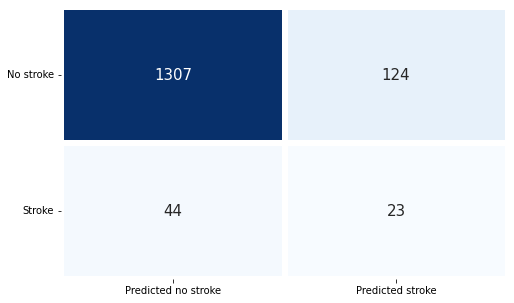

In [ ]:
# I want to fit the XGBClassifier Model
classifier = XGBClassifier(eval_metric= 'error', learning_rate= 0.1)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()



### RandomForest

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1431
           1       0.14      0.13      0.14        67

    accuracy                           0.92      1498
   macro avg       0.55      0.55      0.55      1498
weighted avg       0.92      0.92      0.92      1498

ROC AUC score: 0.7943667407198807
Accuracy Score:  0.9238985313751669


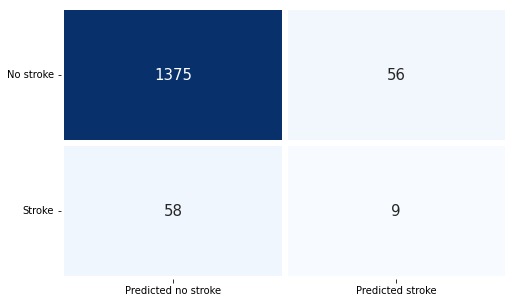

In [ ]:
# I want to fit RandomForest Model
classifier = RandomForestClassifier(criterion= 'gini', n_estimators= 100, random_state= 0)
classifier.fit(X_train_res, y_train_res)
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()



###  5. Conclusion
I started by exploring the data and noticed different features as good indicators for stroke prediction.

After extensive visualisation, I used four Algorithms to predict the model. 

Linear Regression, Decision Tree, Random Forest and XGB Classifier.

With the performance and accuracy of the results obtained,I came to the conclusion that Random Forest Classifier is the best model for predicting stroke using this dataset.